In [1]:
# problem statement make a ml model to preduct the price of house

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df#this is supervised learnig where label that is price is given and label is of continous numeric

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# EDA

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df['Price'].nunique()# it means all 5000 rows has different prices

5000

In [10]:
df['Price'][0]

1059033.5578701235

In [11]:
# now label is price but i want to know about features

In [12]:
#so we neeed to find whuch feature has relation with price

<AxesSubplot:>

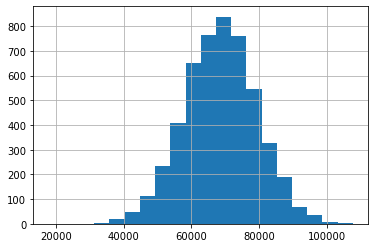

In [15]:
df['Avg. Area Income'].hist(bins=20)#it means most of the people have income range from60000 to 80000

<AxesSubplot:>

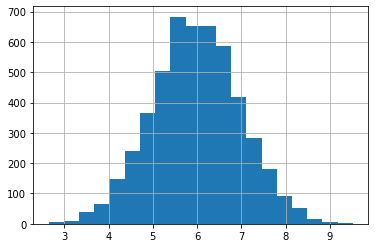

In [17]:
df['Avg. Area House Age'].hist(bins=20)#mostof the house are between 5 to 7 yrs

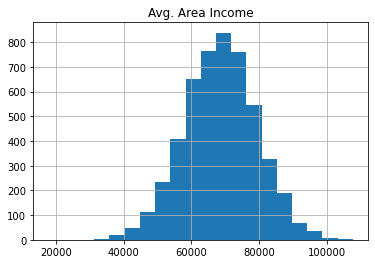

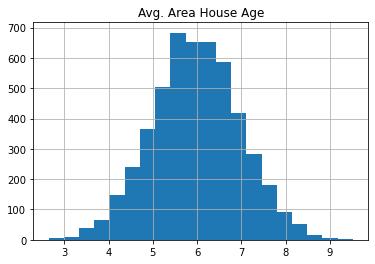

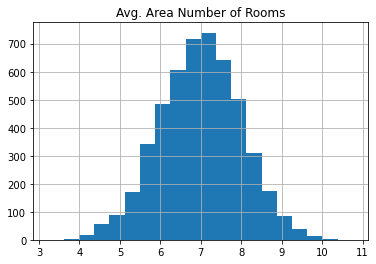

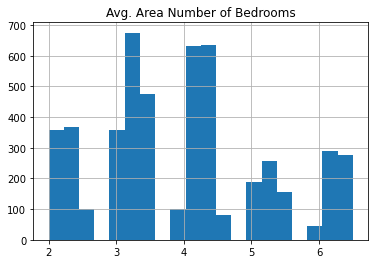

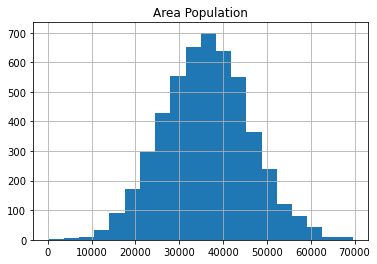

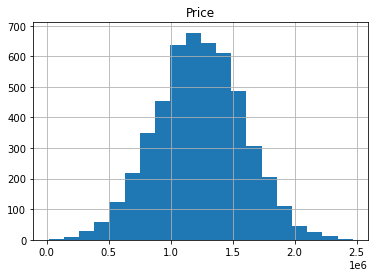

In [20]:
for i in df.columns[:-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()#separately represt the graph no of bedrooms are not very significant and in pric 10^6 to 1.5 million

In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

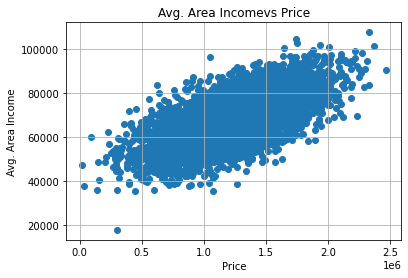

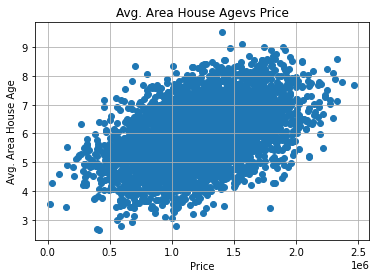

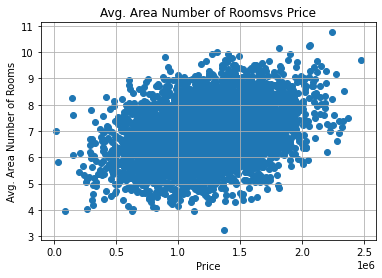

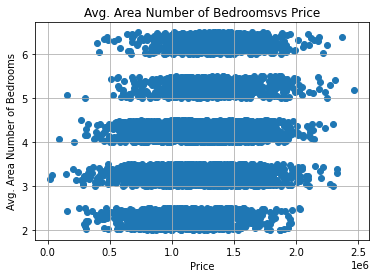

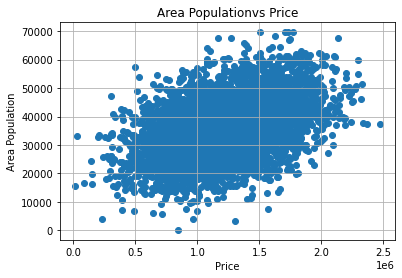

In [24]:
for i in df.columns[:-2]:#hence we are not taking the price and address colmn becoz adress is string and wrt price we are creating
    plt.scatter(df['Price'],df[i])#all the graphs coming linear except bedrooms
    plt.title(i + 'vs Price')
    plt.xlabel('Price')
    plt.ylabel(i)
    plt.grid()
    plt.show()

In [28]:
df['Avg. Area Number of Bedrooms'].nunique()#not categorical

255

In [29]:
import seaborn as sns# we discuss it later

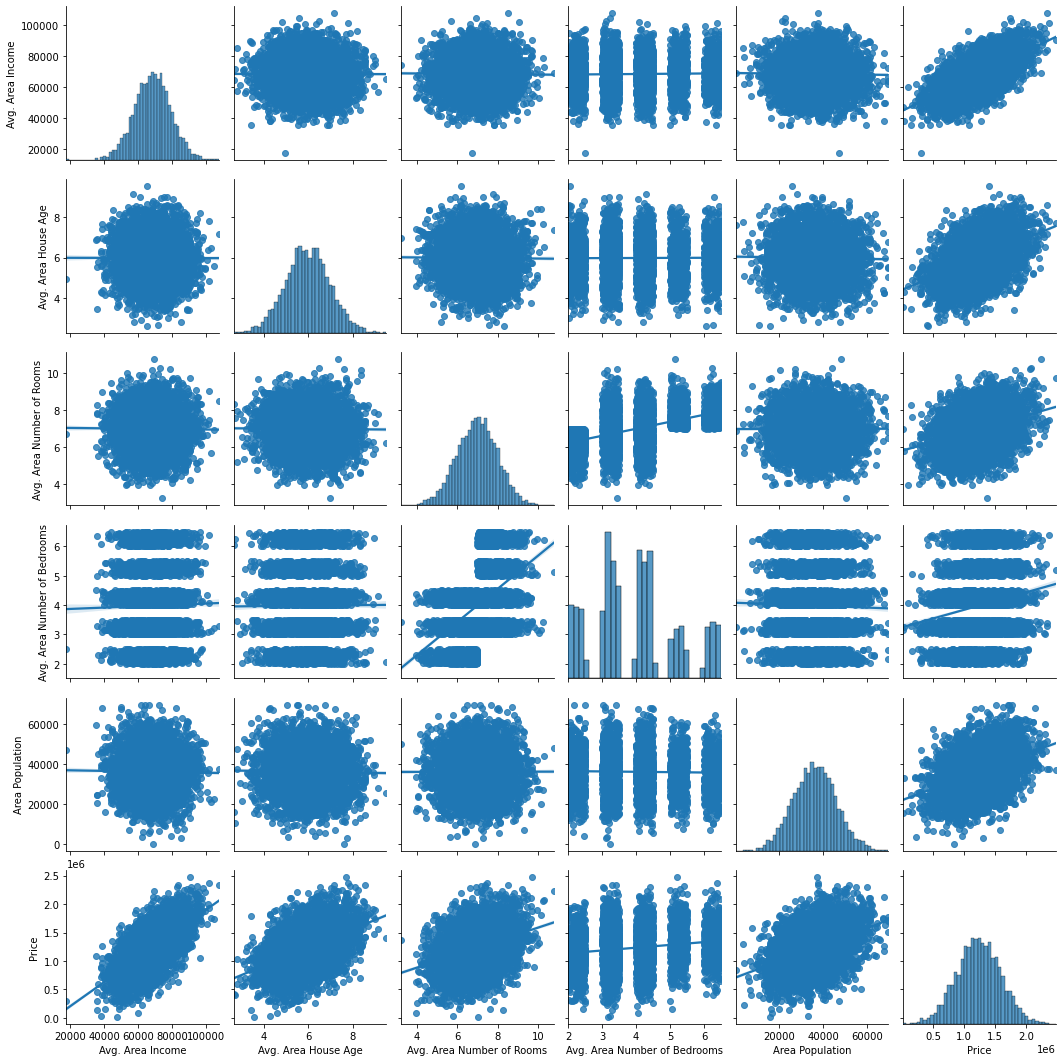

In [30]:
sns.pairplot(df,kind='reg')#seaborn is magical it gives regression plots froms df all columns with one another

In [32]:
# all the histograms diagonally with itself
#and in price we see the reg plots more than any other means in prices all the 4 colmns make lines with price
#no of bedrooms doesnt show linear relation with price but alll other have linearity with price
#we doent talk about adress becos it contains only text we dont know about text data that why leave that colm
#no finally i have cleaned the data i get features and labels
# now the next step is segregate or split

In [33]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [34]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]#except bedrooms and address and price
y=df['Price']#it is label all above are features

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [36]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# now splitting the data

In [37]:
from sklearn.model_selection import train_test_split#here we are import train_test_split from model_selection model

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)#random means give random values and givees random every tym when we call it
#but if i fix random state we fix same random after and after we get same random


In [39]:
xtrain.info()#it gets 3750 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [41]:
xtest.info()#gives 1250 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [43]:
ytrain.shape#for a single series we cannt use info thatswhy we only use shape

(3750,)

In [44]:
ytest.shape

(1250,)

In [45]:
xtrain.head()#gives random

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


# 2, creating the machine learning model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model=LinearRegression()

# 3.Training the model

In [48]:
model.fit(xtrain,ytrain)#this single step train the model

LinearRegression()

In [49]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [50]:
pd.DataFrame(model.coef_,columns=['coef_'],index=x.columns)

,coef_
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


# 4. Evaluation

In [53]:
print('%1.1f%%'%(model.score(xtest,ytest)*100))#overall accuracy by score function means 91.8 is overall accuracy

91.8%


In [54]:
ypred=model.predict(xtest)

In [55]:
ypred# this is prediction score

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447395])

In [56]:
ytest#this is actual 

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
print(mean_absolute_error(ytest,ypred))#ytest is actual and  y pred is predicted dataand it give absolute value of error

80728.01465732268


In [60]:
ypred[0]

1193899.3633509642

In [61]:
100*mean_absolute_error(ytest,ypred)/ypred[0]#means error persentage

6.7617101688320025

In [62]:
#accuracy=1-error
#error=1-accuracy

In [63]:
# coclusion :lets use this model becoz accuracy is more than  90 %

# 5 . Deployment

In [64]:
final_model=model

In [65]:
pd.to_pickle(final_model,'HousePredictor')#save this file pickle means to save